# Morphological Operations 
- Image Thresholding
    - Color Thresholding
    - Binary Thresholding
    - Otsu Thresholding

- Morphological operations
    - Erosion
    - Dilation
    - Opening
    - Closing
    - Top-Hat
- Edge detection algorithms
    - Edge detection 
    - Region-based segmentation
        - Watershed algorithm

## Image Thresholding

### Color Thresholding

In [28]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [112]:
image = cv2.imread('Images/disks.JPG')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow("org",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Use the **cv2.inRange(src, lowerb, upperb[, dst]) -> dst** function to do color thresholding on an image. 

Here, we are saying that all pixels in our image that have a 100 <= R <= 200, 15 <= G <= 56, and 17 <= B <= 50 will be considered red.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


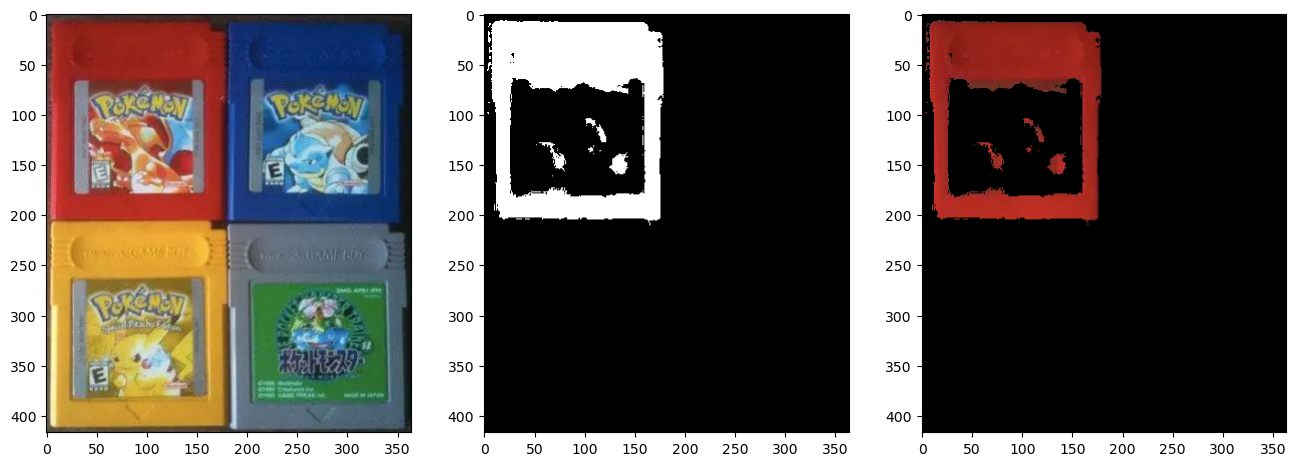

In [114]:
##      [R,  G,  B]
lower = [100, 15, 17]
upper = [200, 56, 50]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
# find the colors within the specified boundaries and apply the mask
mask = cv2.inRange(rgb, lower, upper)
print(mask) 
segmented = cv2.bitwise_and(rgb, rgb, mask=mask)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(rgb)
plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(segmented)

In [120]:
imgs = cv2.imread("Images/coins.JPG")
rgb = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
cv2.imshow("image",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

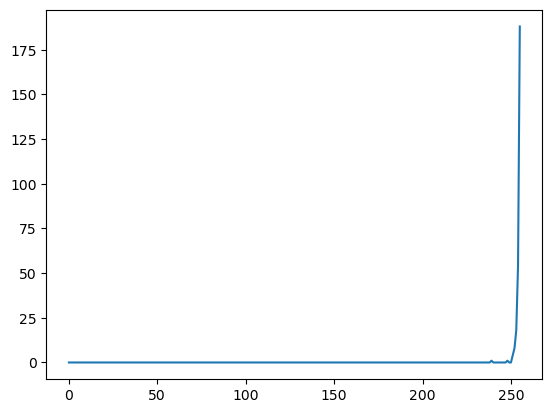

In [32]:
## Calculate Histogram
hist = cv2.calcHist(gray, [0], None, [256], (0, 256))
plt.plot(hist)

###  Binary Thresholding ( THRESH_BINARY )

Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
Parameters: 
- `source`: Input Image array (must be in Grayscale). 
- `thresholdValue`: Value of Threshold below and above which pixel values will change accordingly. 
- `maxVal`: Maximum value that can be assigned to a pixel. 
- `thresholdingTechnique`: The type of thresholding to be applied.

## ThresholdingTechinque
<img src = "./images/fig.png"  alt="drawing" style="width:400px;"/>

In [131]:
# Basic threshold example
th, thresh_img = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
th2, thresh_img2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
masked_img =  cv2.bitwise_and(gray, gray, mask=thresh_img)
subtracted = cv2.subtract(gray,thresh_img)

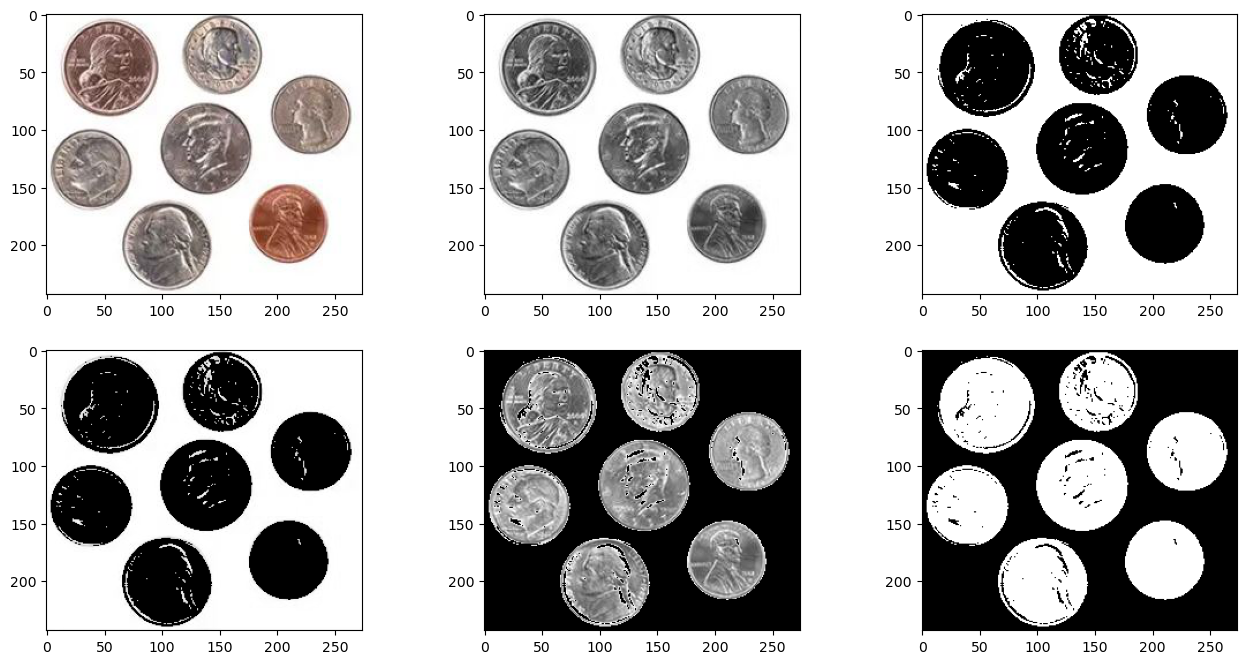

In [132]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(rgb)
plt.subplot(2,3,2)
plt.imshow(gray, cmap="gray")
plt.subplot(2,3,3)
plt.imshow(thresh_img, cmap="gray")
plt.subplot(2,3,4)
plt.imshow(masked_img, cmap="gray")
plt.subplot(2,3,5)
plt.imshow(subtracted, cmap="gray")
plt.subplot(2,3,6)
plt.imshow(thresh_img2, cmap="gray")

### Otsu Thresholding

Otsu’s method then computes an optimal threshold value T such that the variance between the background and foreground peaks is minimal.

However, Otsu’s method has no a priori knowledge of what pixels belong to the foreground and which pixels belong to the background — it’s simply trying to optimally separate the peaks of the histogram.

In [133]:
# Threshold example with Otsu's method
th, thresh_img_otsu = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(th)

187.0


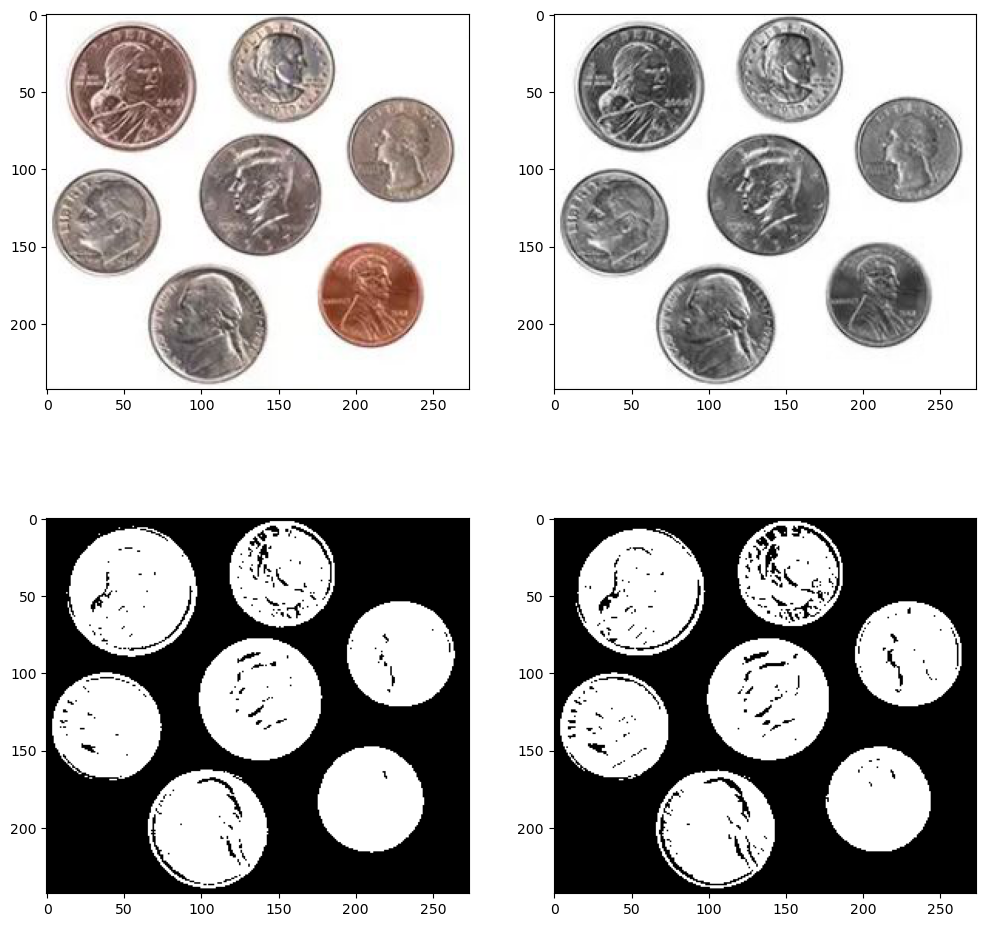

In [135]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.subplot(2,2,2)
plt.imshow(gray, cmap="gray")
plt.subplot(2,2,3)
plt.imshow(thresh_img2, cmap="gray")
plt.subplot(2,2,4)
plt.imshow(thresh_img_otsu, cmap="gray")

---
### Ref : 
- https://learnopencv.com/opencv-threshold-python-cpp/


---

## Morphological Operations

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html<br>

https://docs.opencv.org/3.4/d4/d76/tutorial_js_morphological_ops.html

Morphological operations apply a structuring element to an input image and generate an output image.<br>
- The most basic morphological operations are: Erosion and Dilation. They have a wide array of uses:
    - Removing noise
    - Isolation of individual elements and joining elements in an image.
    - Filling holes in an image or stitching elements

### Erosion 

**cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst**

The function supports the in-place mode. Erosion can be applied several ( iterations ) times.<br>
In case of multi-channel images, each channel is processed independently.

- @param `src` input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- @param `dst` output image of the same size and type as src.
- @param `kernel` structuring element used for erosion; if `element=Mat()`, a `3 x 3` rectangular structuring element is used. Kernel can be created using #getStructuringElement.
- @param `anchor` position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- @param `iterations` number of times erosion is applied.
- @param `borderType` pixel extrapolation method, see #BorderTypes.
- @param `borderValue` border value in case of a constant border

In [137]:
img = cv2.imread('Images/j.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [139]:
eroded = cv2.erode(img, None, iterations=1)

cv2.erode function. This function takes two required arguments and a third optional one.

The first argument is the image that we want to erode

The second argument to cv2.erode is the structuring element. If this value is None, then a 3×3 structuring element.<br>
Of course, you could supply your own custom structuring element here instead of None.

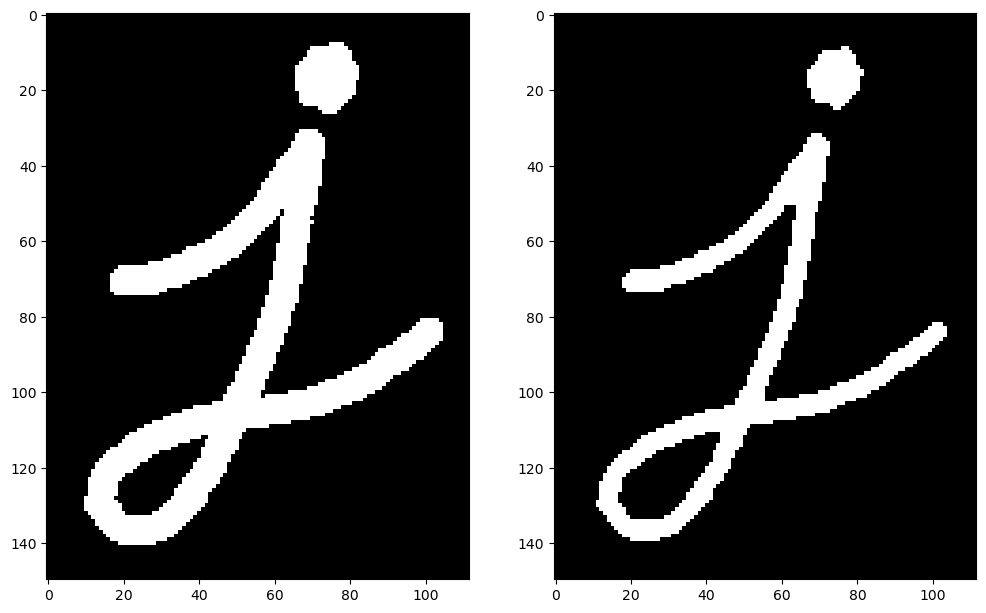

In [39]:
plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(eroded, cmap="gray")

**cv2.getStructuringElement(	shape, ksize[, anchor]	) ->	retval**

`shape`	Element shape that could be one of MorphShapes (cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS)<br>
`ksize`	Size of the structuring element.<br>
`anchor`	Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. Note that only the shape of a cross-shaped element depends on the anchor position. In other cases the anchor just regulates how much the result of the morphological operation is shifted.

In [40]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [41]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [42]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

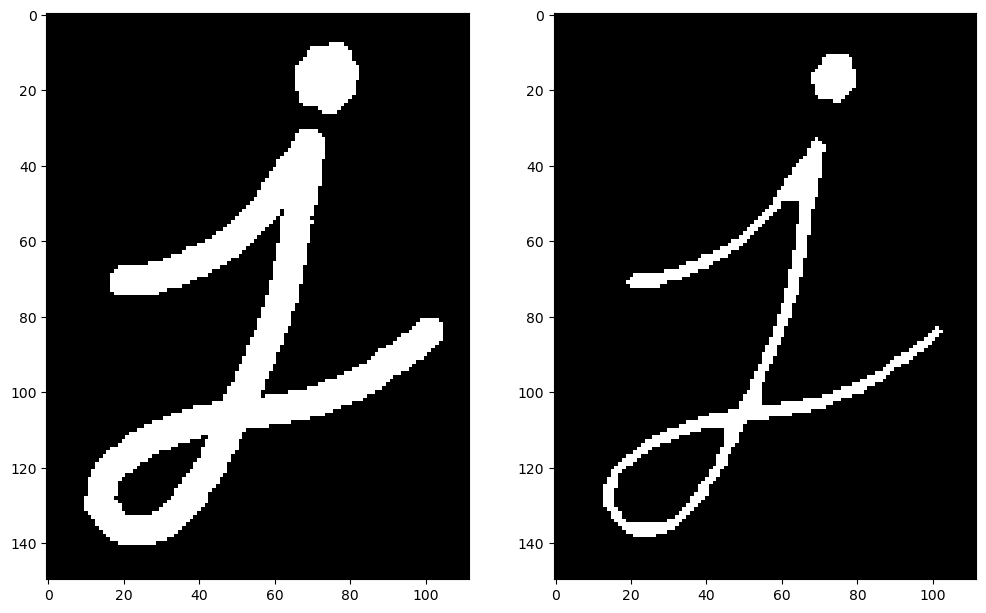

In [43]:
kernel = np.ones((5, 5), np.uint8) # same as: cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
eroded = cv2.erode(img, kernel, iterations=1)

plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(eroded, cmap="gray")

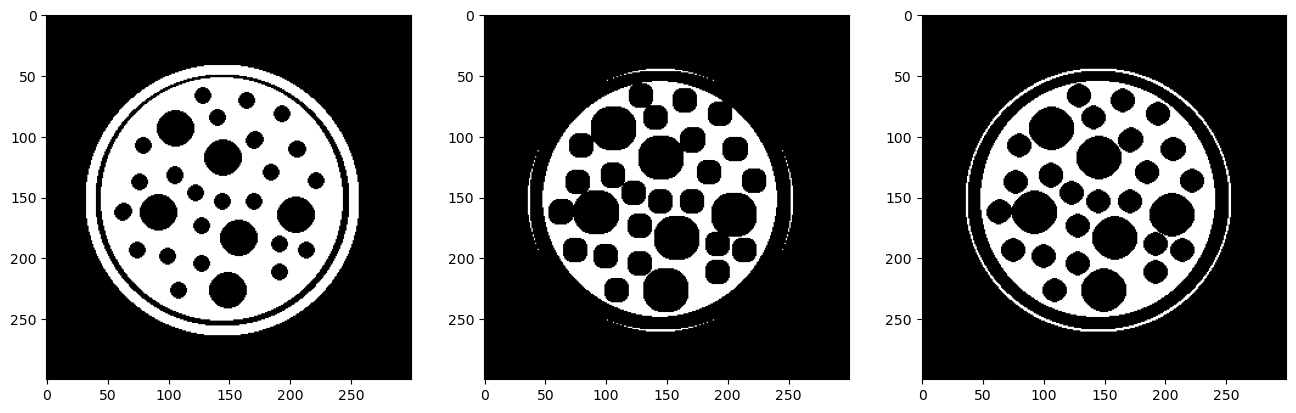

In [44]:
img = cv2.imread('Images/circles.png', cv2.IMREAD_GRAYSCALE)

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, [7, 7])
disk_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [7, 7])

eroded_rect = cv2.erode(img, rect_kernel, iterations=1)
eroded_disk = cv2.erode(img, disk_kernel, iterations=1)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(eroded_rect, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(eroded_disk, cmap="gray")

### Dilation

In [140]:
img = cv2.imread('Images/j.png', cv2.IMREAD_GRAYSCALE)
dilated = cv2.dilate(img, None, iterations=1)

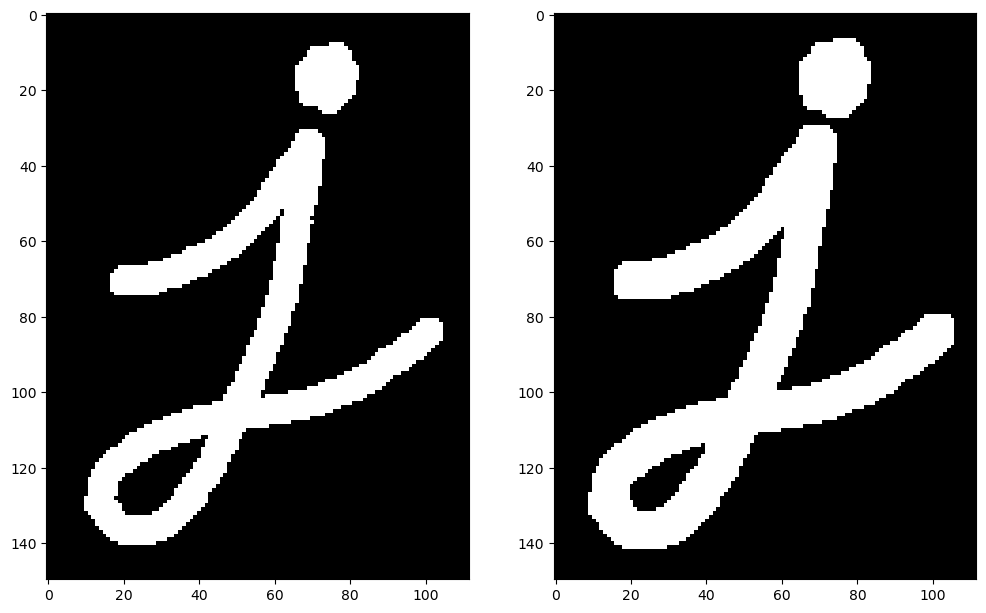

In [46]:
plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(dilated, cmap="gray")

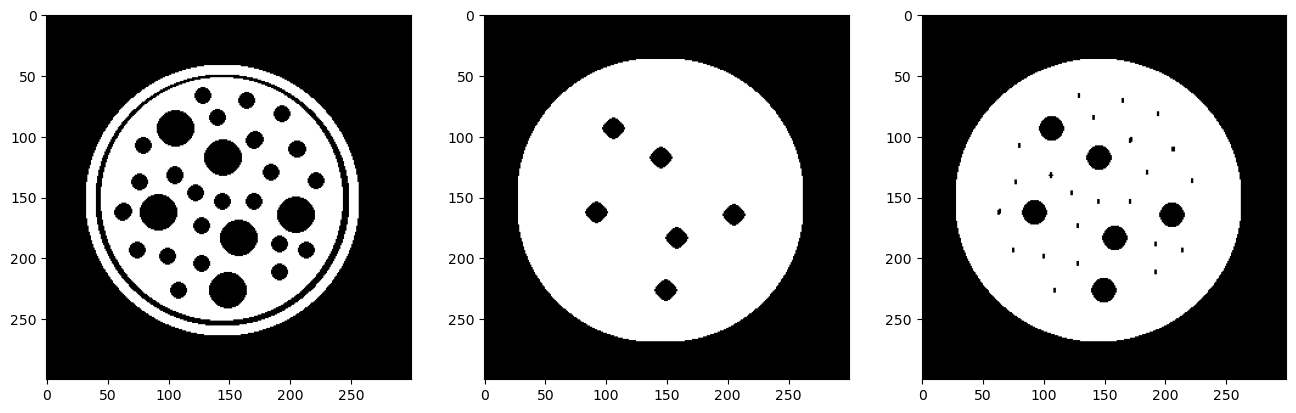

In [47]:
img = cv2.imread('Images/circles.png', cv2.IMREAD_GRAYSCALE)

kernel_size = [11, 11]
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
disk_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

dilated_rect = cv2.dilate(img, rect_kernel, iterations=1)
dilated_disk = cv2.dilate(img, disk_kernel, iterations=1)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(dilated_rect, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(dilated_disk, cmap="gray")

### Opening

Erosion followed by Dilation

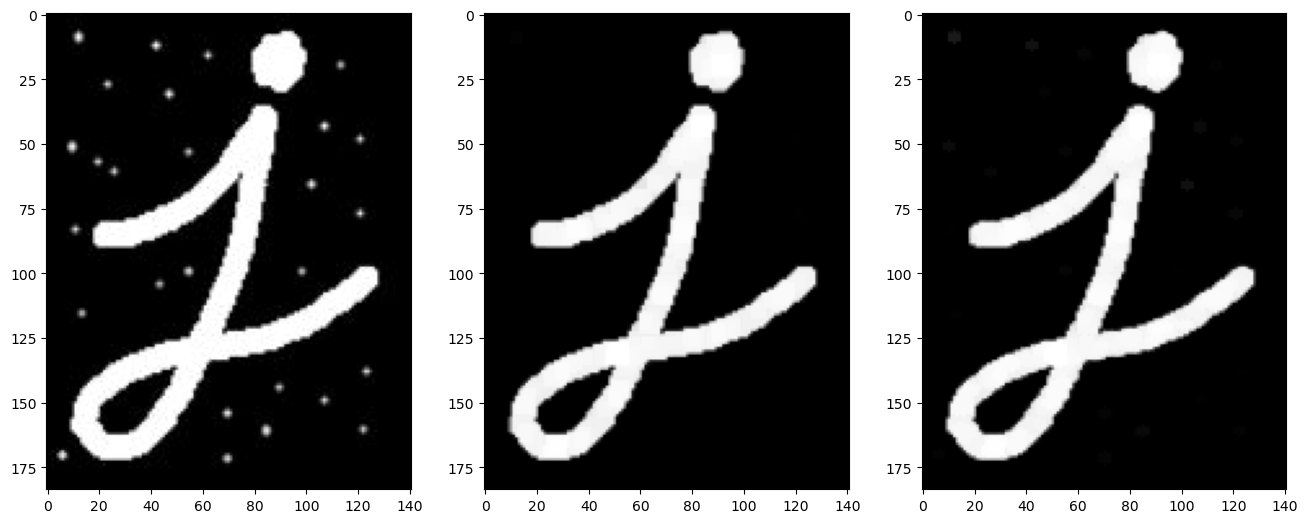

In [48]:
img = cv2.imread('Images/j_noise.JPG', cv2.IMREAD_GRAYSCALE)

kernel_size = [5, 5]
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
disk_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

open_rect = cv2.morphologyEx(img, cv2.MORPH_OPEN, rect_kernel)
open_disk = cv2.morphologyEx(img, cv2.MORPH_OPEN, disk_kernel)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(open_rect, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(open_disk, cmap="gray")

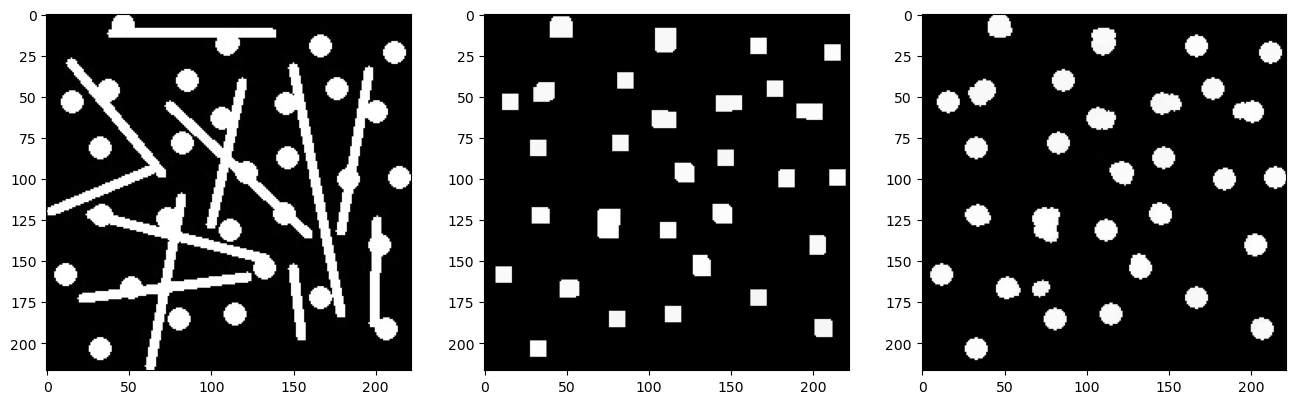

In [49]:
img = cv2.imread('Images/sticksandcircles.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = [9, 9]
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
disk_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

open_rect = cv2.morphologyEx(img, cv2.MORPH_OPEN, rect_kernel)
open_disk = cv2.morphologyEx(img, cv2.MORPH_OPEN, disk_kernel)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(open_rect, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(open_disk, cmap="gray")

### Closing

Dilation followed by Erosion

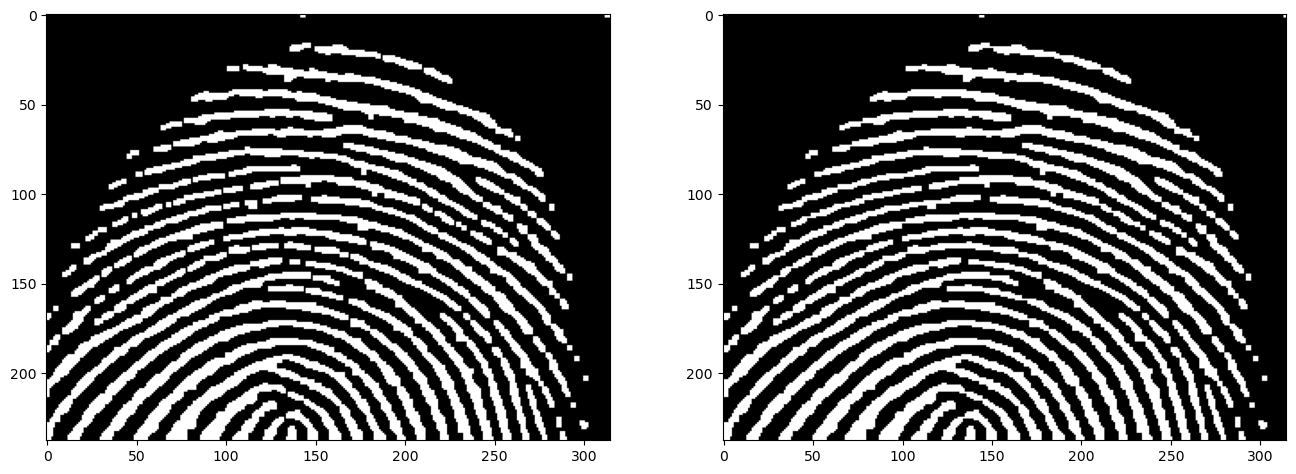

In [50]:
img = cv2.imread('Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

kernel_size = [4, 1]
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

close_rect = cv2.morphologyEx(img, cv2.MORPH_COSEL, rect_kernel)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(close_rect, cmap="gray")

### Closing & Opening

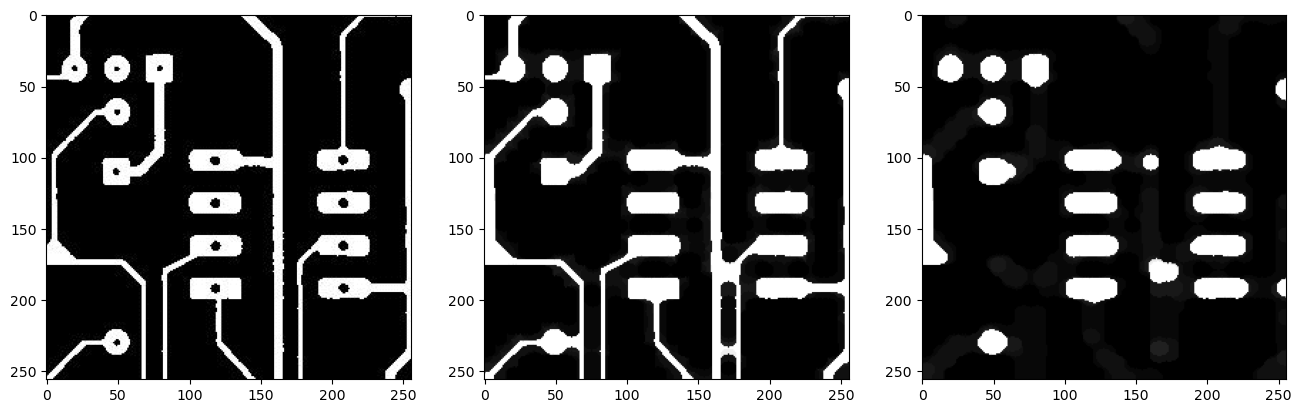

In [51]:
img = cv2.imread('Images/circuit.png', cv2.IMREAD_GRAYSCALE)

kernel_size = [11, 11]
disk_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

close_disk = cv2.morphologyEx(img, cv2.MORPH_CLOSE, disk_kernel)
open_close_disk = cv2.morphologyEx(close_disk, cv2.MORPH_OPEN, disk_kernel)

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(close_disk, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(open_close_disk, cmap="gray")

### Top-Hat

The Top-Hat operation is based on erosion.

`Top-Hat = Image - Eroded_Image`

We can use this operation to unify the lightness of an image.<br>
Simply, we erode the image with a very large kernel, so that all objects are eroded and remains the background only. Then, we subtract the resulting (background) image from the original image (i.e., performing background subtraction).

145.0


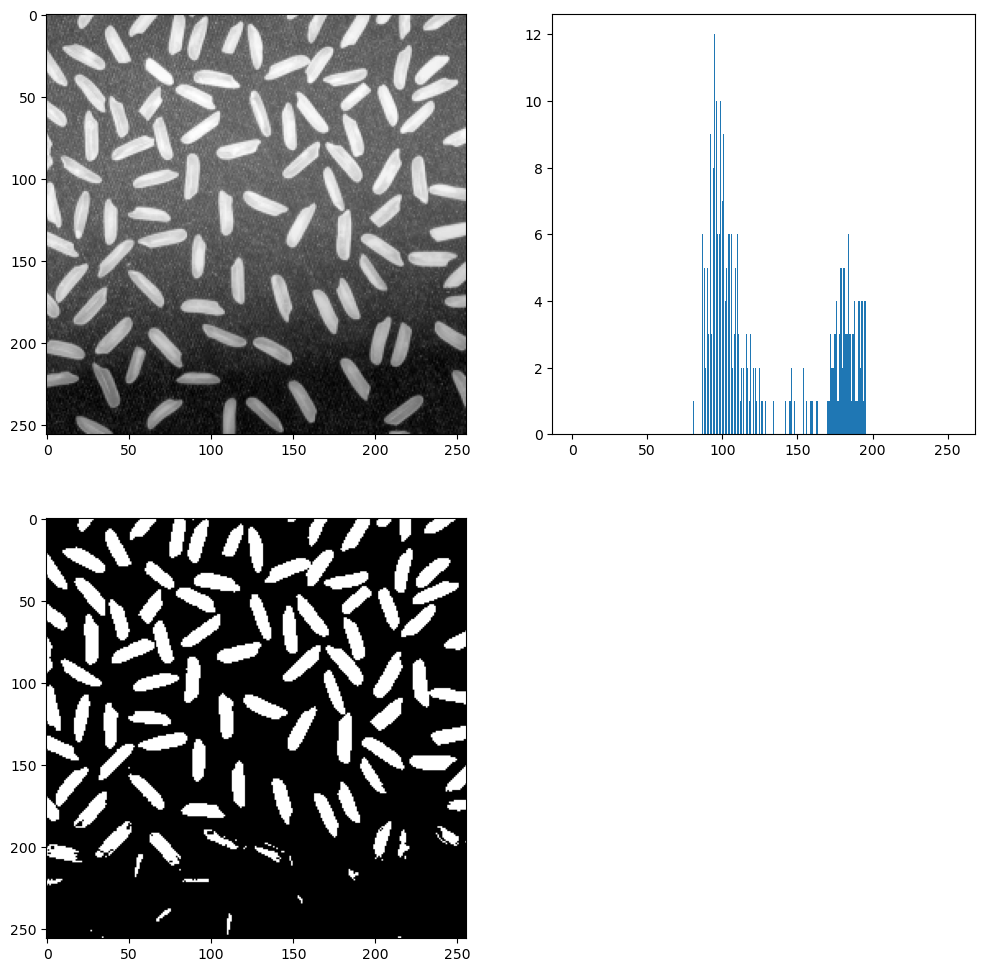

In [52]:
img = cv2.imread('Images/rice.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist(img, [0], None, [256], [0, 256])

t, thresh_img = cv2.threshold(img, 145, 255, cv2.THRESH_BINARY) # + cv2.THRESH_OTSU
print(t)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(2,2,2)
plt.bar([x for x in range(256)], hist[:, 0])
plt.subplot(2,2,3)
plt.imshow(thresh_img, cmap="gray")

50.0


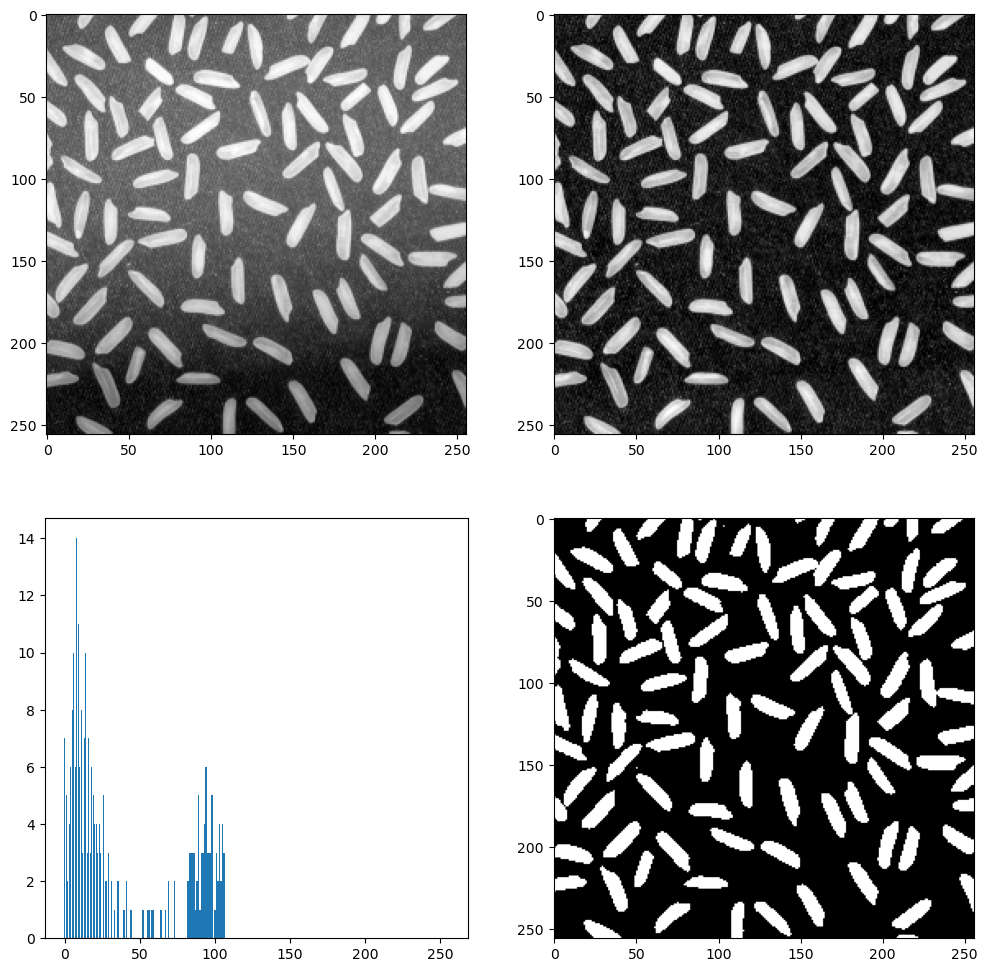

In [53]:
kernel_size = [50, 50] ## Large enough kernel to erode all rice objects
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

tophat_rect = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rect_kernel)
hist = cv2.calcHist(tophat_rect, [0], None, [256], [0, 256])

t, thresh_img = cv2.threshold(tophat_rect, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # + cv2.THRESH_OTSU
print(t)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(tophat_rect, cmap="gray")
plt.subplot(2,2,3)
plt.bar([x for x in range(256)], hist[:, 0])
plt.subplot(2,2,4)
plt.imshow(thresh_img, cmap="gray")

50.0
57.0


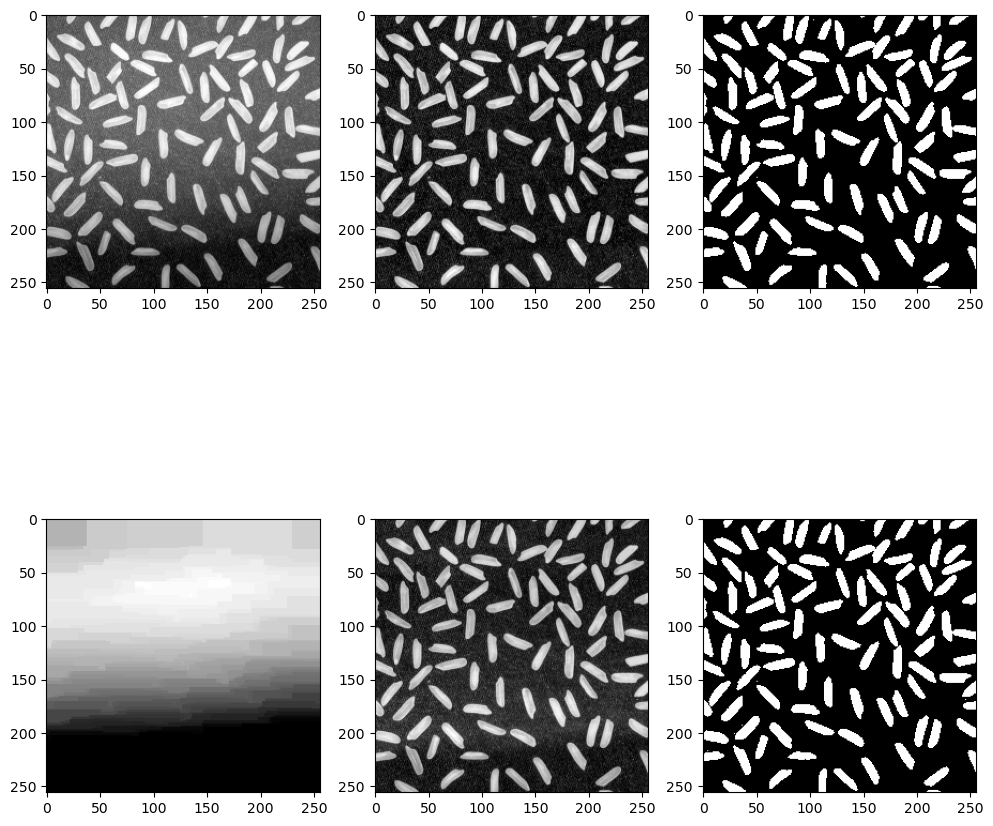

In [54]:
kernel_size = [50, 50] ## Large enough kernel to erode all rice objects
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

tophat_rect = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rect_kernel)
eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, rect_kernel)
tophat = img - eroded

t, thresh_img_1 = cv2.threshold(tophat_rect, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # + cv2.THRESH_OTSU
print(t)

t, thresh_img_2 = cv2.threshold(tophat, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # + cv2.THRESH_OTSU
print(t)

plt.figure(figsize=(12, 12))
plt.subplot(2,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(2,3,2)
plt.imshow(tophat_rect, cmap="gray")
plt.subplot(2,3,3)
plt.imshow(thresh_img_1, cmap="gray")
plt.subplot(2,3,4)
plt.imshow(eroded, cmap="gray")
plt.subplot(2,3,5)
plt.imshow(tophat, cmap="gray")
plt.subplot(2,3,6)
plt.imshow(thresh_img_2, cmap="gray")

--- 
## Edge Detection

<img src = "https://learnopencv.com/wp-content/uploads/2021/10/pg3-edge-detection.gif"  alt="drawing" style="width:400px;"/>

In [60]:
# Read the original image
img = cv2.imread('./Images/input_image-1.jpg',0) 

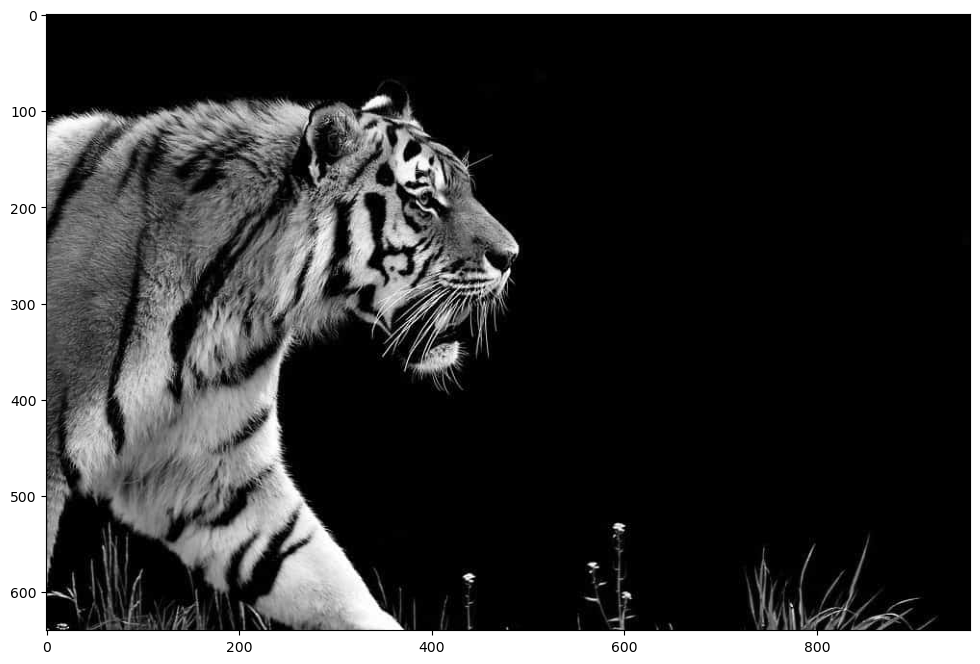

In [61]:
plt.figure(figsize=(16, 8))
plt.subplot(1,1,1)
plt.imshow(img, cmap="gray")


In [68]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img,ksize = (3,3), sigmaX=1, sigmaY=1) 

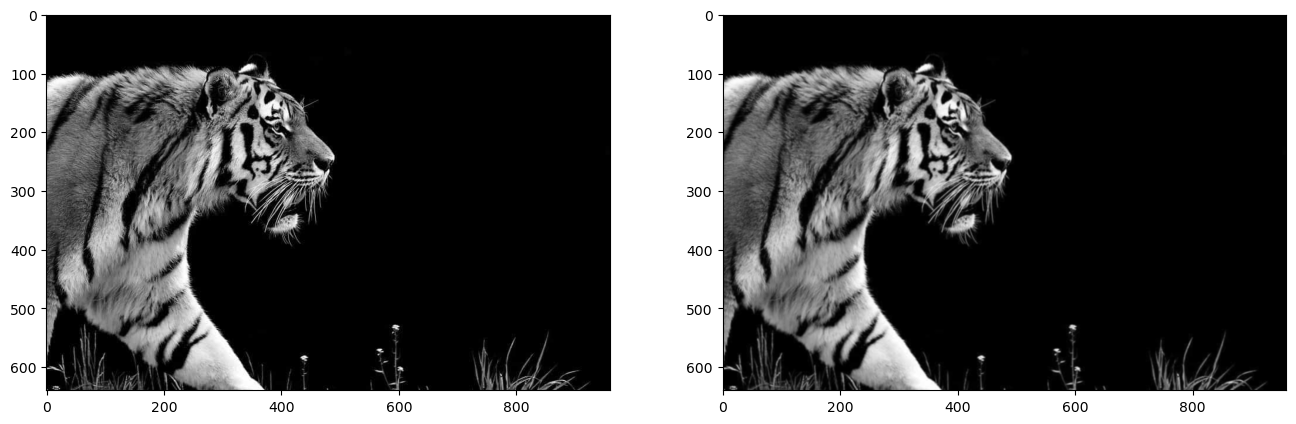

In [69]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_blur, cmap="gray")

Text(0.5, 1.0, 'sobelxy Image')

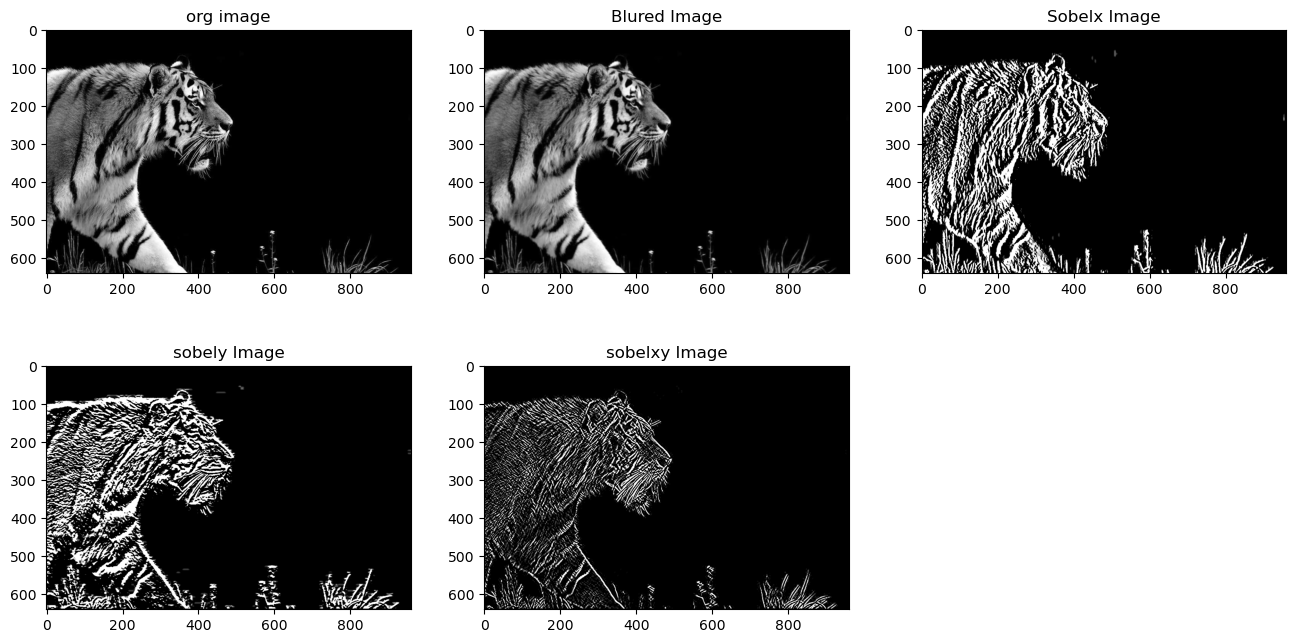

In [86]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
 
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("org image")
plt.subplot(2,3,2)
plt.imshow(img_blur, cmap=plt.cm.gray)
plt.title("Blured Image")
plt.subplot(2,3,3)
plt.imshow(sobelx, cmap=plt.cm.gray)
plt.title("Sobelx Image")
plt.subplot(2,3,4)
plt.imshow(sobely, cmap=plt.cm.gray)
plt.title("sobely Image")
plt.subplot(2,3,5)
plt.imshow(sobelxy, cmap=plt.cm.gray)
plt.title("sobelxy Image")

## Canny Edge Detection 
The following is the syntax for applying [Canny edge](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) detection using OpenCV:
- `Canny(image, threshold1, threshold2)`

In [87]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 


Text(0.5, 1.0, 'Canny Image')

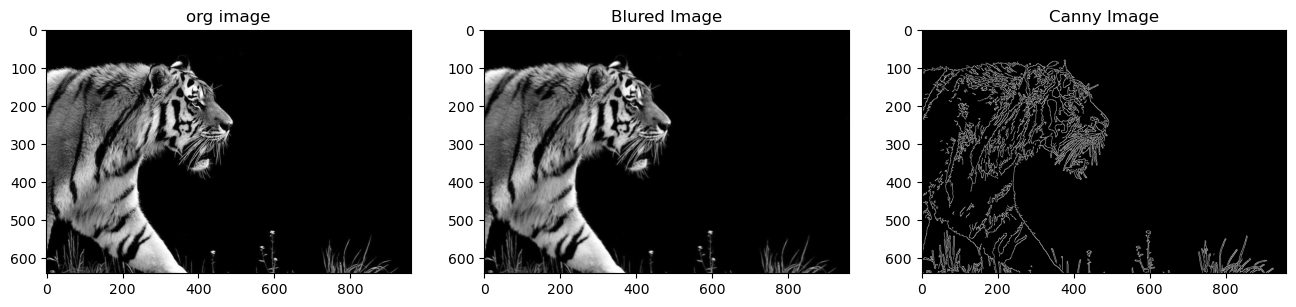

In [88]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("org image")
plt.subplot(2,3,2)
plt.imshow(img_blur, cmap=plt.cm.gray)
plt.title("Blured Image")
plt.subplot(2,3,3)
plt.imshow(edges, cmap=plt.cm.gray)
plt.title("Canny Image")

Text(0.5, 1.0, 'Canny Image')

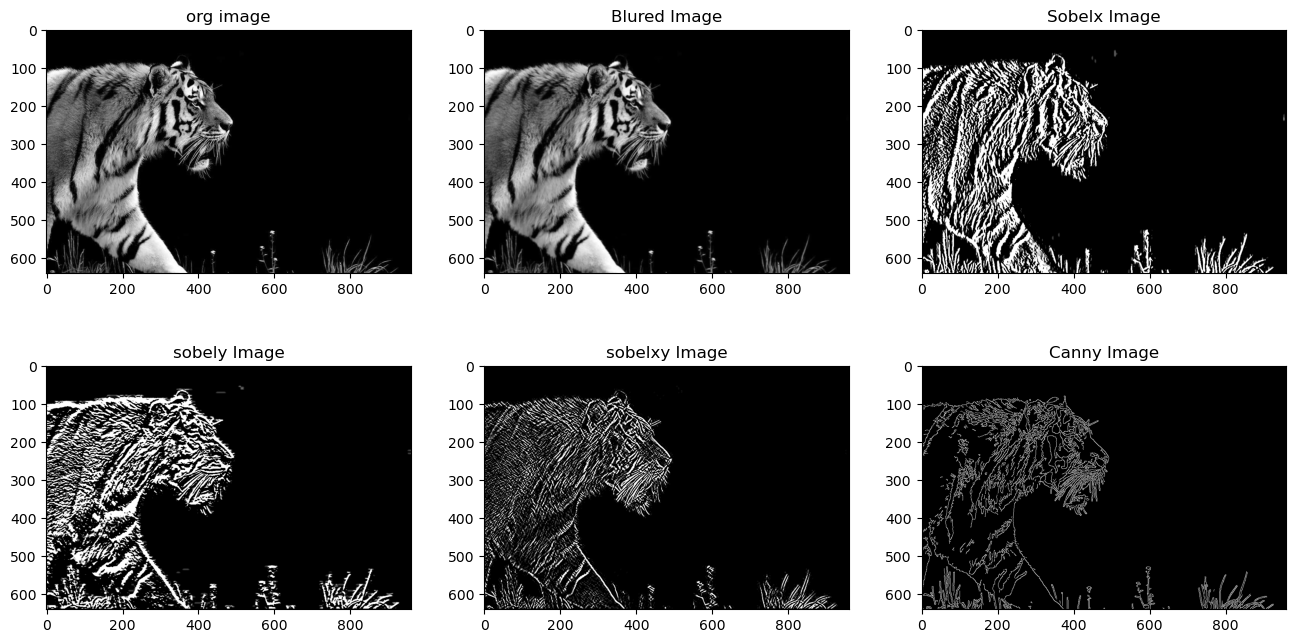

In [89]:
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("org image")
plt.subplot(2,3,2)
plt.imshow(img_blur, cmap=plt.cm.gray)
plt.title("Blured Image")
plt.subplot(2,3,3)
plt.imshow(sobelx, cmap=plt.cm.gray)
plt.title("Sobelx Image")
plt.subplot(2,3,4)
plt.imshow(sobely, cmap=plt.cm.gray)
plt.title("sobely Image")
plt.subplot(2,3,5)
plt.imshow(sobelxy, cmap=plt.cm.gray)
plt.title("sobelxy Image")
plt.subplot(2,3,6)
plt.imshow(edges, cmap=plt.cm.gray)
plt.title("Canny Image")

----
## Region-based segmentation

<img src = "https://ch.mathworks.com/discovery/image-segmentation/_jcr_content/mainParsys3/discoverysubsection_1185333930/mainParsys3/image_copy.adapt.full.medium.jpg/1680174415288.jpg"  alt="drawing" style="width:800px;"/>

Text(0.5, 1.0, 'thres image')

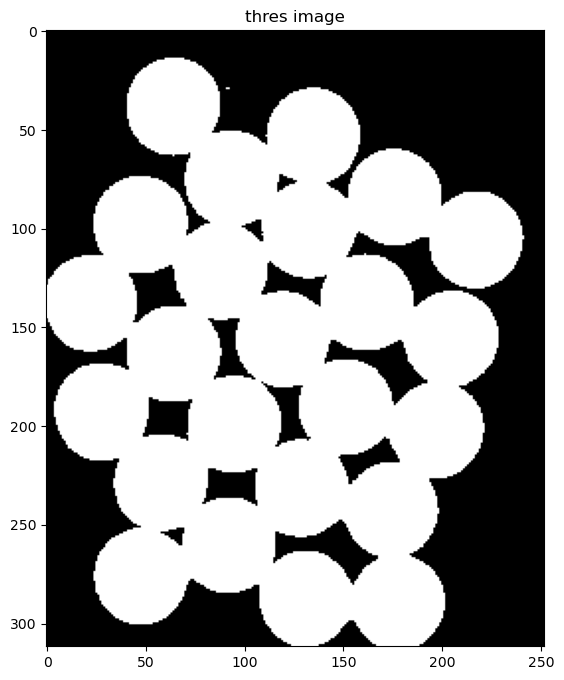

In [105]:

img = cv2.imread('./Images/coins2.JPG')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.figure(figsize=(16, 8))
plt.subplot(1,1,1)
plt.imshow(thresh, cmap=plt.cm.gray)
plt.title("thres image")

Text(0.5, 1.0, 'Finding unknown region')

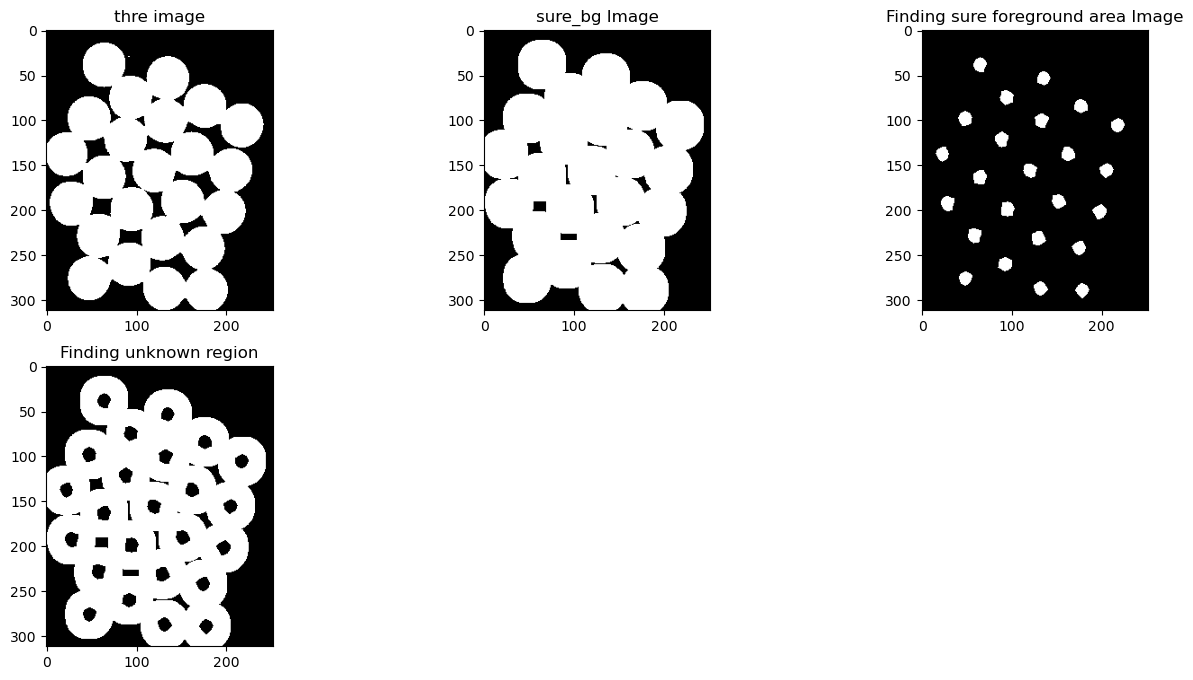

In [106]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(thresh, cmap=plt.cm.gray)
plt.title("thre image")
plt.subplot(2,3,2)
plt.imshow(sure_bg, cmap=plt.cm.gray)
plt.title("sure_bg Image")
plt.subplot(2,3,3)
plt.imshow(sure_fg, cmap=plt.cm.gray)
plt.title("Finding sure foreground area Image")
plt.subplot(2,3,4)
plt.imshow(unknown, cmap=plt.cm.gray)
plt.title("Finding unknown region")

In [107]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

Text(0.5, 1.0, 'watershed image')

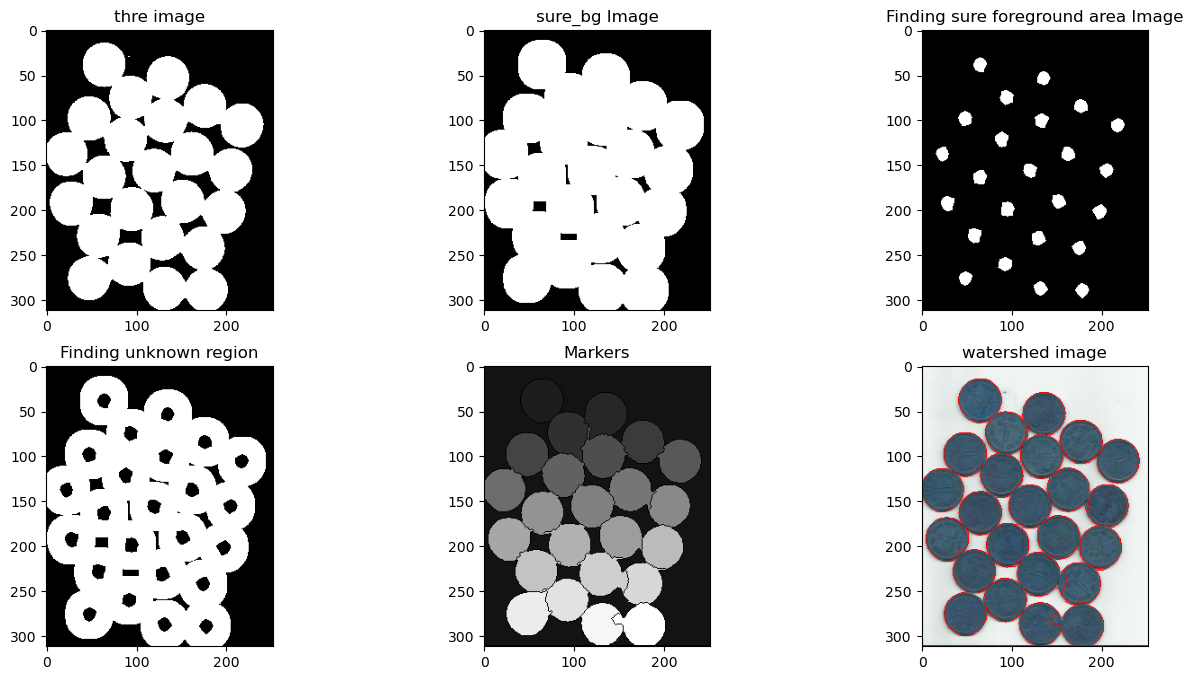

In [110]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
plt.imshow(thresh, cmap=plt.cm.gray)
plt.title("thre image")
plt.subplot(2,3,2)
plt.imshow(sure_bg, cmap=plt.cm.gray)
plt.title("sure_bg Image")
plt.subplot(2,3,3)
plt.imshow(sure_fg, cmap=plt.cm.gray)
plt.title("Finding sure foreground area Image")
plt.subplot(2,3,4)
plt.imshow(unknown, cmap=plt.cm.gray)
plt.title("Finding unknown region")
plt.subplot(2,3,5)
plt.imshow(markers, cmap=plt.cm.gray)
plt.title("Markers")
plt.subplot(2,3,6)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("watershed image")